In [47]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [48]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


cpu


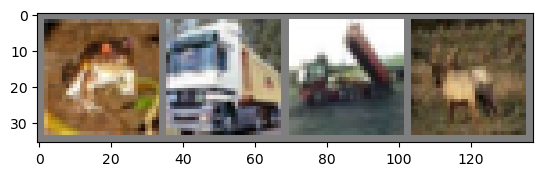

frog  truck truck deer 


In [49]:
import matplotlib.pyplot as plt
import numpy as np

#Check which device is being used

if torch.cuda.is_available():
    device = torch.device("cuda")          
else:
    device = torch.device("cpu")
print(device)

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
images, labels = images.to(device), labels.to(device)

In [71]:
import torch.nn as nn
import torch.nn.functional as F

class NetNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.to(device) # convert input tensor to GPU type
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class NetCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = x.to(device) # convert input tensor to GPU type
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



listOfNets = [NetCNN(), NetNN(), NetCNN(), NetNN(), NetCNN(), NetNN()]
listOfMethods = [optim.SGD, optim.SGD, optim.Adam, optim.Adam, optim.SGD, optim.SGD]
listOfNames = ["CNN_SGD","NN_SGD","CNN_Adam","NN_Adam","CNN_SGD_M0","NN_SGD_M0"]
##copy paste date based on which data trying to load
date = "07-04-2023-16-03-09"
folder = "Models"


##Networks = [net, netSGD...]
##Optimizers = []


listOfPaths = ["CNN_SGD.pth","NN_SGD.pth","CNN_Adam.pth","NN_Adam.pth","CNN_SGD_M0.pth","NN_SGD_M0.pth"]

# get the absolute path of the current working directory
cwd = os.getcwd()

# create a new directory called "models" in the current working directory
models_dir = os.path.join(cwd, "Models")


models_subdir = os.path.join(models_dir, f"{date}")

listOfLossLists = [[]]*6
listOfAccuracyLists = [[]]*6

# create a file path for the saved model
listOfLoads = True
if listOfLoads != False:
    for i in range(len(listOfPaths)):
        loadPath = os.path.join(models_subdir, f"model_{listOfPaths[i]}")
        listOfNets[i].load_state_dict(torch.load(loadPath,map_location=torch.device('cpu')))
        listOfNets[i] = listOfNets[i].to(device)
        loadPath = os.path.join(models_subdir, f"model_loss_{listOfPaths[i]}")
        listOfLossLists[i] = torch.load(loadPath,map_location=torch.device('cpu'))
        loadPath = os.path.join(models_subdir, f"model_acc_{listOfPaths[i]}")
        listOfAccuracyLists[i] = torch.load(loadPath,map_location=torch.device('cpu'))
    


   
    
    

In [18]:
import torch.optim as optim
listOfOptimizers = []
for i in range(len(listOfMethods)):
    listOfOptimizers.append(listOfMethods[i](listOfNets[i].parameters(), lr = .001))
    
listOfOptimizers[0] = listOfMethods[0](listOfNets[0].parameters(), lr = .001, momentum = .9)
listOfOptimizers[1] = listOfMethods[1](listOfNets[1].parameters(), lr = .001, momentum = .9)

# listOfOptimizers.append(optim.SGD(listOfNets[0].parameters(), lr=0.001))
# listOfOptimizers.append(optim.SGD(listOfNets[1].parameters(), lr=0.001))
# listOfOptimizers.append(optim.Adam(listOfNets[2].parameters(), lr=0.001 ))
# listOfOptimizers.append(optim.Adam(listOfNets[3].parameters(), lr=0.001 ))
# listOfOptimizers.append(optim.Adadelta(listOfNets[4].parameters(), lr=0.001))
# listOfOptimizers.append(optim.Adadelta(listOfNets[5].parameters(), lr=0.001))

criterion = nn.CrossEntropyLoss()


In [28]:
 # get the inputs; data is a list of [inputs, labels]
net = listOfNets[0]

dataiter = iter(trainloader)
data = next(dataiter)

inputs, labels = data
inputs, labels = inputs.to(device), labels.to(device)

# zero the parameter gradients
#optimizer.zero_grad()

# forward + backward + optimize
outputs = net(inputs)
loss = criterion(outputs, labels)


In [29]:
print(loss)

tensor(2.2690, device='cuda:0', grad_fn=<NllLossBackward0>)


In [46]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
 
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = classes[int(y[0])]
            #print(y)
            
            scores = model(x)
            _, predictions = scores.max(1)
            predictions = classes[int(predictions[0])]
            #print(predictions)
            num_correct += int(predictions == y)
            num_samples += 1
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}') 
    
    return float(num_correct)/float(num_samples)

    model.train()

In [31]:
##for loop the dicitonaries, define optimizer and net
listOfLossLists = [[],[],[],[],[],[]]
listOfAccuracyLists = [[],[],[],[],[],[]]
for j in range(len(listOfOptimizers)):
    optimizer = listOfOptimizers[j]
    net = listOfNets[j]
   
    
    for epoch in range(40):  # loop over the dataset multiple times


        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0
        listOfLossLists[j].append(running_loss)
        listOfAccuracyLists[j].append(check_accuracy(testloader, net))

    print('Finished Training')
    


[1,  2000] loss: 2.192
[1,  4000] loss: 1.857
[1,  6000] loss: 1.643
[1,  8000] loss: 1.543
[1, 10000] loss: 1.519
[1, 12000] loss: 1.464
[2,  2000] loss: 1.403
[2,  4000] loss: 1.377
[2,  6000] loss: 1.321
[2,  8000] loss: 1.281
[2, 10000] loss: 1.299
[2, 12000] loss: 1.238
[3,  2000] loss: 1.217
[3,  4000] loss: 1.217
[3,  6000] loss: 1.171
[3,  8000] loss: 1.153
[3, 10000] loss: 1.170
[3, 12000] loss: 1.129
[4,  2000] loss: 1.111
[4,  4000] loss: 1.109
[4,  6000] loss: 1.083
[4,  8000] loss: 1.057
[4, 10000] loss: 1.082
[4, 12000] loss: 1.049
[5,  2000] loss: 1.034
[5,  4000] loss: 1.036
[5,  6000] loss: 1.015
[5,  8000] loss: 0.990
[5, 10000] loss: 1.020
[5, 12000] loss: 0.983
[6,  2000] loss: 0.965
[6,  4000] loss: 0.972
[6,  6000] loss: 0.952
[6,  8000] loss: 0.933
[6, 10000] loss: 0.959
[6, 12000] loss: 0.936
[7,  2000] loss: 0.909
[7,  4000] loss: 0.926
[7,  6000] loss: 0.908
[7,  8000] loss: 0.886
[7, 10000] loss: 0.919
[7, 12000] loss: 0.883
[8,  2000] loss: 0.871
[8,  4000] 

[18, 12000] loss: 0.876
[19,  2000] loss: 0.843
[19,  4000] loss: 0.844
[19,  6000] loss: 0.841
[19,  8000] loss: 0.856
[19, 10000] loss: 0.844
[19, 12000] loss: 0.848
[20,  2000] loss: 0.835
[20,  4000] loss: 0.826
[20,  6000] loss: 0.830
[20,  8000] loss: 0.833
[20, 10000] loss: 0.828
[20, 12000] loss: 0.839
[21,  2000] loss: 0.816
[21,  4000] loss: 0.815
[21,  6000] loss: 0.809
[21,  8000] loss: 0.828
[21, 10000] loss: 0.821
[21, 12000] loss: 0.822
[22,  2000] loss: 0.793
[22,  4000] loss: 0.807
[22,  6000] loss: 0.801
[22,  8000] loss: 0.821
[22, 10000] loss: 0.804
[22, 12000] loss: 0.818
[23,  2000] loss: 0.789
[23,  4000] loss: 0.789
[23,  6000] loss: 0.791
[23,  8000] loss: 0.800
[23, 10000] loss: 0.782
[23, 12000] loss: 0.806
[24,  2000] loss: 0.763
[24,  4000] loss: 0.778
[24,  6000] loss: 0.764
[24,  8000] loss: 0.796
[24, 10000] loss: 0.776
[24, 12000] loss: 0.800
[25,  2000] loss: 0.770
[25,  4000] loss: 0.774
[25,  6000] loss: 0.751
[25,  8000] loss: 0.779
[25, 10000] loss

[36,  2000] loss: 0.751
[36,  4000] loss: 0.741
[36,  6000] loss: 0.772
[36,  8000] loss: 0.733
[36, 10000] loss: 0.774
[36, 12000] loss: 0.728
[37,  2000] loss: 0.746
[37,  4000] loss: 0.755
[37,  6000] loss: 0.749
[37,  8000] loss: 0.747
[37, 10000] loss: 0.758
[37, 12000] loss: 0.721
[38,  2000] loss: 0.755
[38,  4000] loss: 0.755
[38,  6000] loss: 0.759
[38,  8000] loss: 0.744
[38, 10000] loss: 0.774
[38, 12000] loss: 0.727
[39,  2000] loss: 0.740
[39,  4000] loss: 0.737
[39,  6000] loss: 0.734
[39,  8000] loss: 0.739
[39, 10000] loss: 0.788
[39, 12000] loss: 0.755
[40,  2000] loss: 0.694
[40,  4000] loss: 0.742
[40,  6000] loss: 0.720
[40,  8000] loss: 0.751
[40, 10000] loss: 0.757
[40, 12000] loss: 0.697
Finished Training
[1,  2000] loss: 1.888
[1,  4000] loss: 1.773
[1,  6000] loss: 1.720
[1,  8000] loss: 1.692
[1, 10000] loss: 1.688
[1, 12000] loss: 1.680
[2,  2000] loss: 1.620
[2,  4000] loss: 1.606
[2,  6000] loss: 1.580
[2,  8000] loss: 1.562
[2, 10000] loss: 1.579
[2, 12000

[13,  8000] loss: 1.062
[13, 10000] loss: 1.104
[13, 12000] loss: 1.084
[14,  2000] loss: 1.062
[14,  4000] loss: 1.065
[14,  6000] loss: 1.047
[14,  8000] loss: 1.035
[14, 10000] loss: 1.073
[14, 12000] loss: 1.056
[15,  2000] loss: 1.034
[15,  4000] loss: 1.039
[15,  6000] loss: 1.019
[15,  8000] loss: 1.009
[15, 10000] loss: 1.044
[15, 12000] loss: 1.029
[16,  2000] loss: 1.009
[16,  4000] loss: 1.014
[16,  6000] loss: 0.993
[16,  8000] loss: 0.984
[16, 10000] loss: 1.016
[16, 12000] loss: 1.004
[17,  2000] loss: 0.984
[17,  4000] loss: 0.989
[17,  6000] loss: 0.969
[17,  8000] loss: 0.960
[17, 10000] loss: 0.989
[17, 12000] loss: 0.980
[18,  2000] loss: 0.960
[18,  4000] loss: 0.966
[18,  6000] loss: 0.946
[18,  8000] loss: 0.940
[18, 10000] loss: 0.964
[18, 12000] loss: 0.956
[19,  2000] loss: 0.936
[19,  4000] loss: 0.945
[19,  6000] loss: 0.924
[19,  8000] loss: 0.917
[19, 10000] loss: 0.942
[19, 12000] loss: 0.933
[20,  2000] loss: 0.915
[20,  4000] loss: 0.924
[20,  6000] loss

[30, 10000] loss: 0.835
[30, 12000] loss: 0.833
[31,  2000] loss: 0.793
[31,  4000] loss: 0.828
[31,  6000] loss: 0.797
[31,  8000] loss: 0.803
[31, 10000] loss: 0.819
[31, 12000] loss: 0.818
[32,  2000] loss: 0.777
[32,  4000] loss: 0.811
[32,  6000] loss: 0.780
[32,  8000] loss: 0.789
[32, 10000] loss: 0.802
[32, 12000] loss: 0.801
[33,  2000] loss: 0.762
[33,  4000] loss: 0.796
[33,  6000] loss: 0.766
[33,  8000] loss: 0.773
[33, 10000] loss: 0.788
[33, 12000] loss: 0.786
[34,  2000] loss: 0.745
[34,  4000] loss: 0.779
[34,  6000] loss: 0.751
[34,  8000] loss: 0.756
[34, 10000] loss: 0.772
[34, 12000] loss: 0.770
[35,  2000] loss: 0.730
[35,  4000] loss: 0.765
[35,  6000] loss: 0.736
[35,  8000] loss: 0.741
[35, 10000] loss: 0.757
[35, 12000] loss: 0.756
[36,  2000] loss: 0.714
[36,  4000] loss: 0.750
[36,  6000] loss: 0.722
[36,  8000] loss: 0.726
[36, 10000] loss: 0.742
[36, 12000] loss: 0.742
[37,  2000] loss: 0.700
[37,  4000] loss: 0.734
[37,  6000] loss: 0.707
[37,  8000] loss

In [33]:
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
# get the absolute path of the current working directory
cwd = os.getcwd()

# create a new directory called "models" in the current working directory
models_dir = os.path.join(cwd, "Models")
os.makedirs(models_dir, exist_ok=True)

models_subdir = os.path.join(models_dir, f"{dt_string}")
os.makedirs(models_subdir, exist_ok=True)


# create a file path for the saved model

for i in range(len(listOfPaths)):
    savePath = os.path.join(models_subdir, f"model_{listOfPaths[i]}")
    # save the model to the file path
    torch.save(listOfNets[i].state_dict(), savePath)
    savePath = os.path.join(models_subdir, f"model_loss_{listOfPaths[i]}")
    torch.save(listOfLossLists[i], savePath)
    savePath = os.path.join(models_subdir, f"model_acc_{listOfPaths[i]}")
    torch.save(listOfAccuracyLists[i], savePath)

In [7]:
fig, axs = plt.subplots(net.conv1.weight.shape[0],net.conv1.weight.shape[1], figsize = (100,100))

for i in range(net.conv1.weight.shape[0]):
    for j in range(net.conv1.weight.shape[1]):
        
        
        a = net.conv1.weight[i,j]
        a = a.detach().numpy()
        axs[i,j].imshow(a, cmap = 'hot')


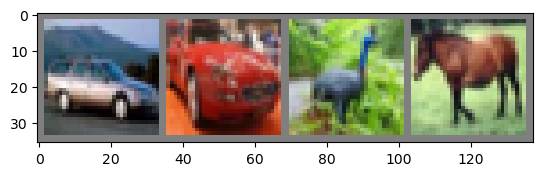

car   car   bird  horse


In [52]:
images.shape
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


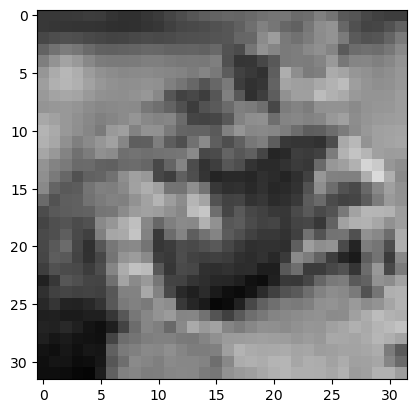

In [29]:
imshow(torchvision.utils.make_grid((images[1])[1]))



In [ ]:
for i in range(6):
    print(listOfNames[i])
    check_accuracy(testloader, listOfNets[i])

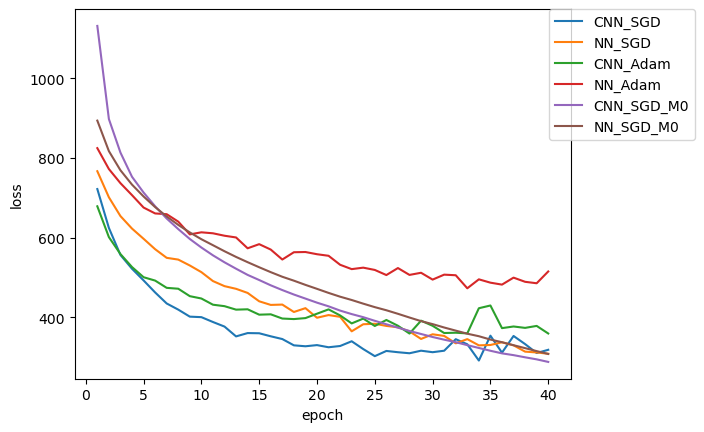

In [74]:
len(listOfAccuracyLists[4])

40

In [72]:
for i in range(0,4):
    loadPath = os.path.join('final/07-04-2023-17-04-43', f"model_loss_{listOfPaths[i]}")
    listOfLossLists[i] = torch.load(loadPath,map_location=torch.device('cpu'))
    loadPath = os.path.join('final/07-04-2023-17-04-43', f"model_acc_{listOfPaths[i]}")
    listOfAccuracyLists[i] = torch.load(loadPath,map_location=torch.device('cpu'))


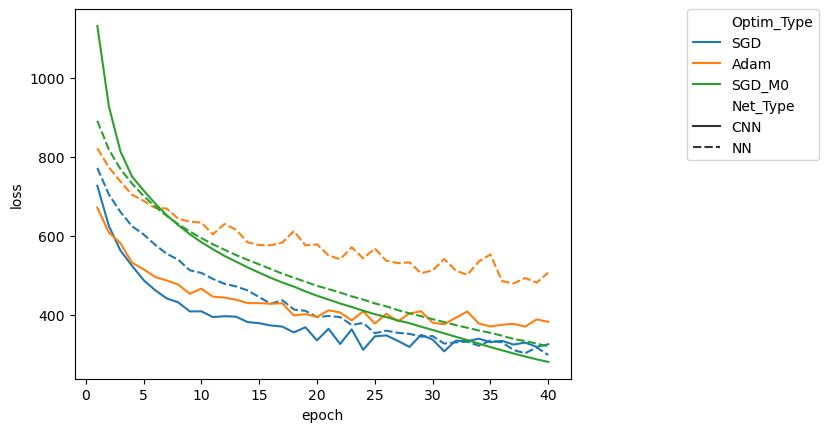

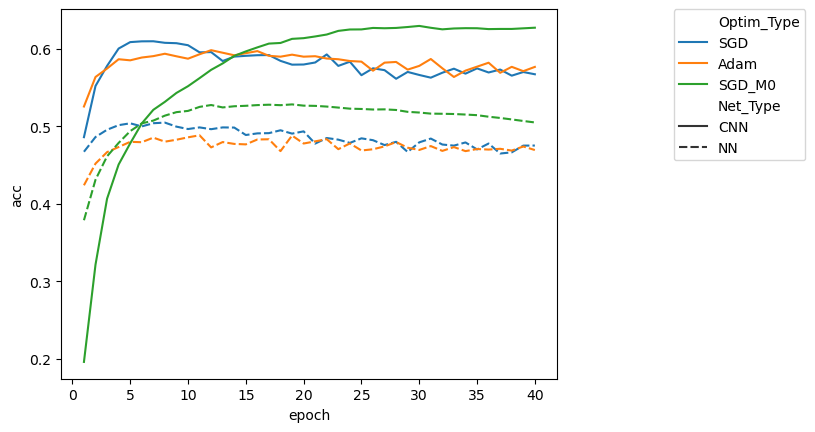

In [75]:
listOfDataFrames = []
#listOfLossLists = [[1,2,3]]*6
listOfOptsNames = ["SGD", "Adam", "SGD_M0"]
listOfNetNames = ["CNN","NN"]
#listOfAccuracyLists = [range(1,len(listOfLossLists[0])+1)]*6

for i in range(len(listOfNames)):
    lossDF = pd.DataFrame({"epoch":range(1,len(listOfLossLists[i])+1), "loss":listOfLossLists[i], "acc":listOfAccuracyLists[i]})
    
    #namesDF = pd.DataFrame(data=[listOfNets[i%2], listOfOpts[int(i/2)]], columns=["Net_Type", "OptimType"])
    namesDF = pd.DataFrame({"Net_Type":[listOfNetNames[i%2]],"Optim_Type":[listOfOptsNames[int(i/2)]]})
                                                                 
    
       # namesDF = pd.DataFrame({"Net_Type":[listOfNets[1]]})
    optimDF = pd.DataFrame(({"Optim_Type":[listOfOptsNames[int(i/2)]]}))
    listOfDataFrames.append(lossDF.merge(namesDF, how = 'cross'))
lossDF = pd.concat(listOfDataFrames)
lossDF.head()
lossDF.tail()
lossDF.index = range(lossDF.shape[0])
lossDF[lossDF.index.duplicated()]
sns.lineplot(data = lossDF, x = "epoch", y = "loss", style = "Net_Type", hue = "Optim_Type")
plt.legend(bbox_to_anchor=(1.5,1), borderaxespad = 0)
plt.show()
sns.lineplot(data = lossDF, x = "epoch", y = "acc", style = "Net_Type", hue = "Optim_Type")
plt.legend(bbox_to_anchor=(1.5,1), borderaxespad = 0)
plt.show()



In [41]:
bc = []
ac = []
acr = []
acrMP = []
BF = []
k = []
net = listOfNets[0]
for i in range(images.shape[0]):
    bc.append(torchvision.utils.make_grid((images[i]) )/2 + .5)
    for j in range(6):
        
   
        ac.append((net.conv1(images[i])[j])) 
        acr.append(F.relu(net.conv1(images[i])[j]))
        acrMP.append(net.pool(F.relu(net.conv1(images[i])[j])[None,:]))
        k.append(net.conv1.weight[j])

    BF.append(net.pool(F.relu(net.conv2(net.pool(F.relu(net.conv1(images[i]))[None,:])))))
        
    


In [11]:
ac[0].shape



torch.Size([28, 28])

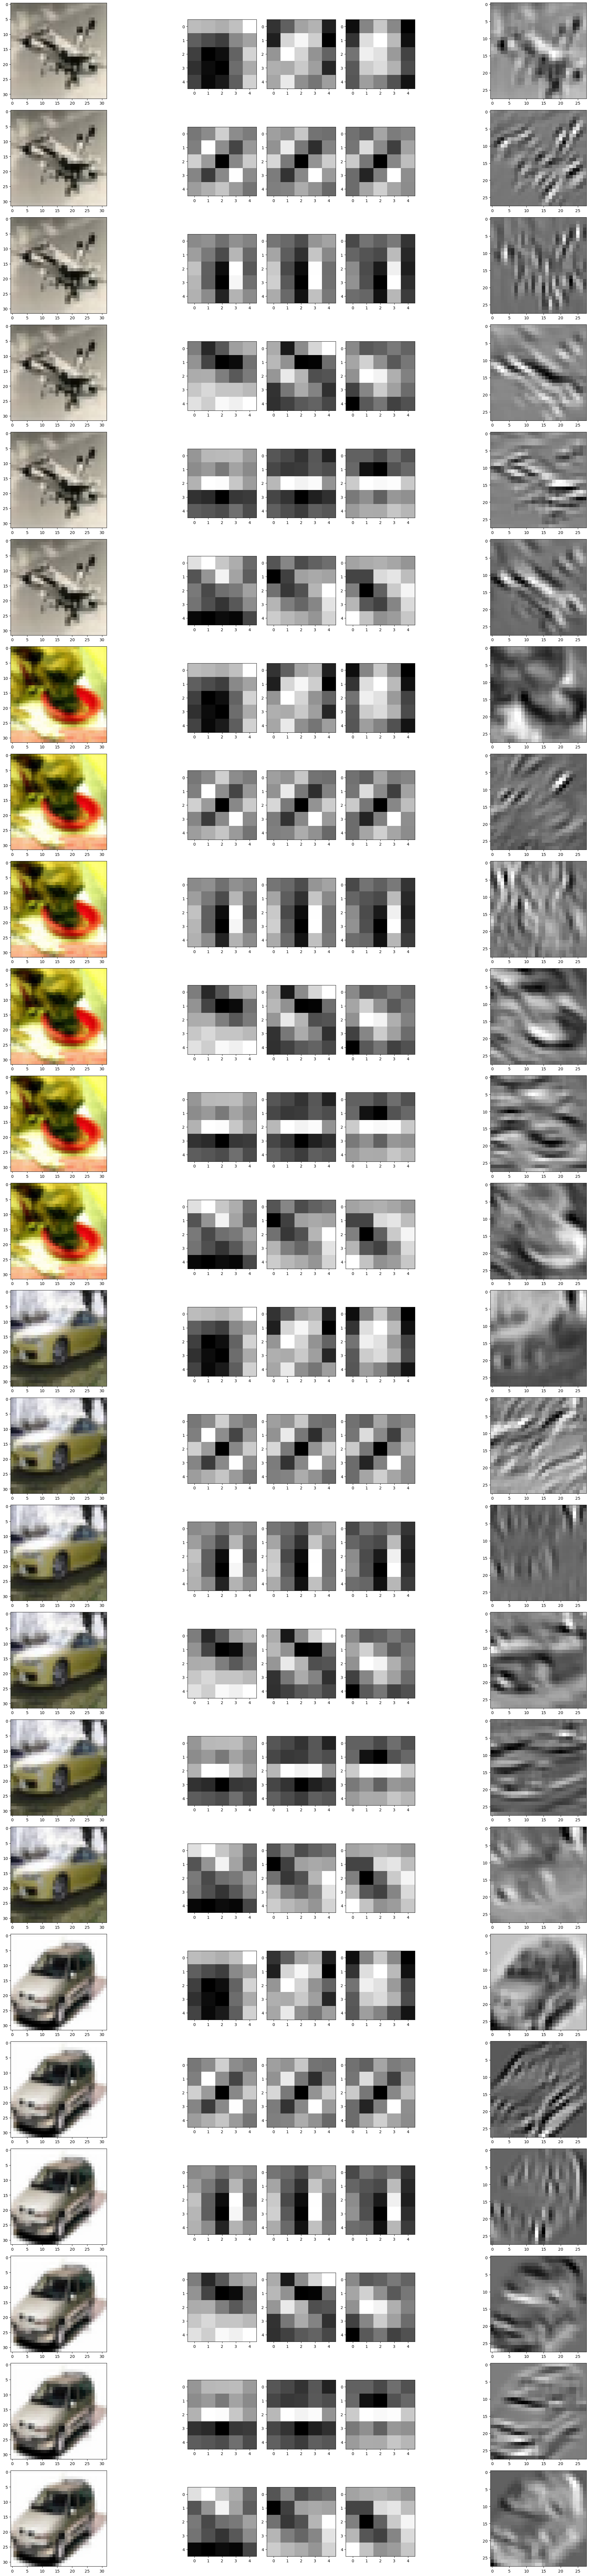

In [53]:
fig = plt.figure(constrained_layout = True, figsize = (25,90))
subfigs = fig.subfigures(len(ac),3)
for i in range(len(ac)):
    ax0 = subfigs[i,0].subplots(1,1)
    sub1 = subfigs[i,1].subplots(1,3)
  
    bcm = np.transpose(bc[int(i/6)],(1,2,0))
    
    
    ax2 = subfigs[i,2].subplots(1,1)
    ax2.imshow(ac[i].detach(), cmap = 'gray')
    ax0.imshow(bcm)
    for j in range(3):
        sub1[j].imshow(k[i][j].detach(), cmap = 'gray')
        
        
        
    
    

IndexError: list index out of range

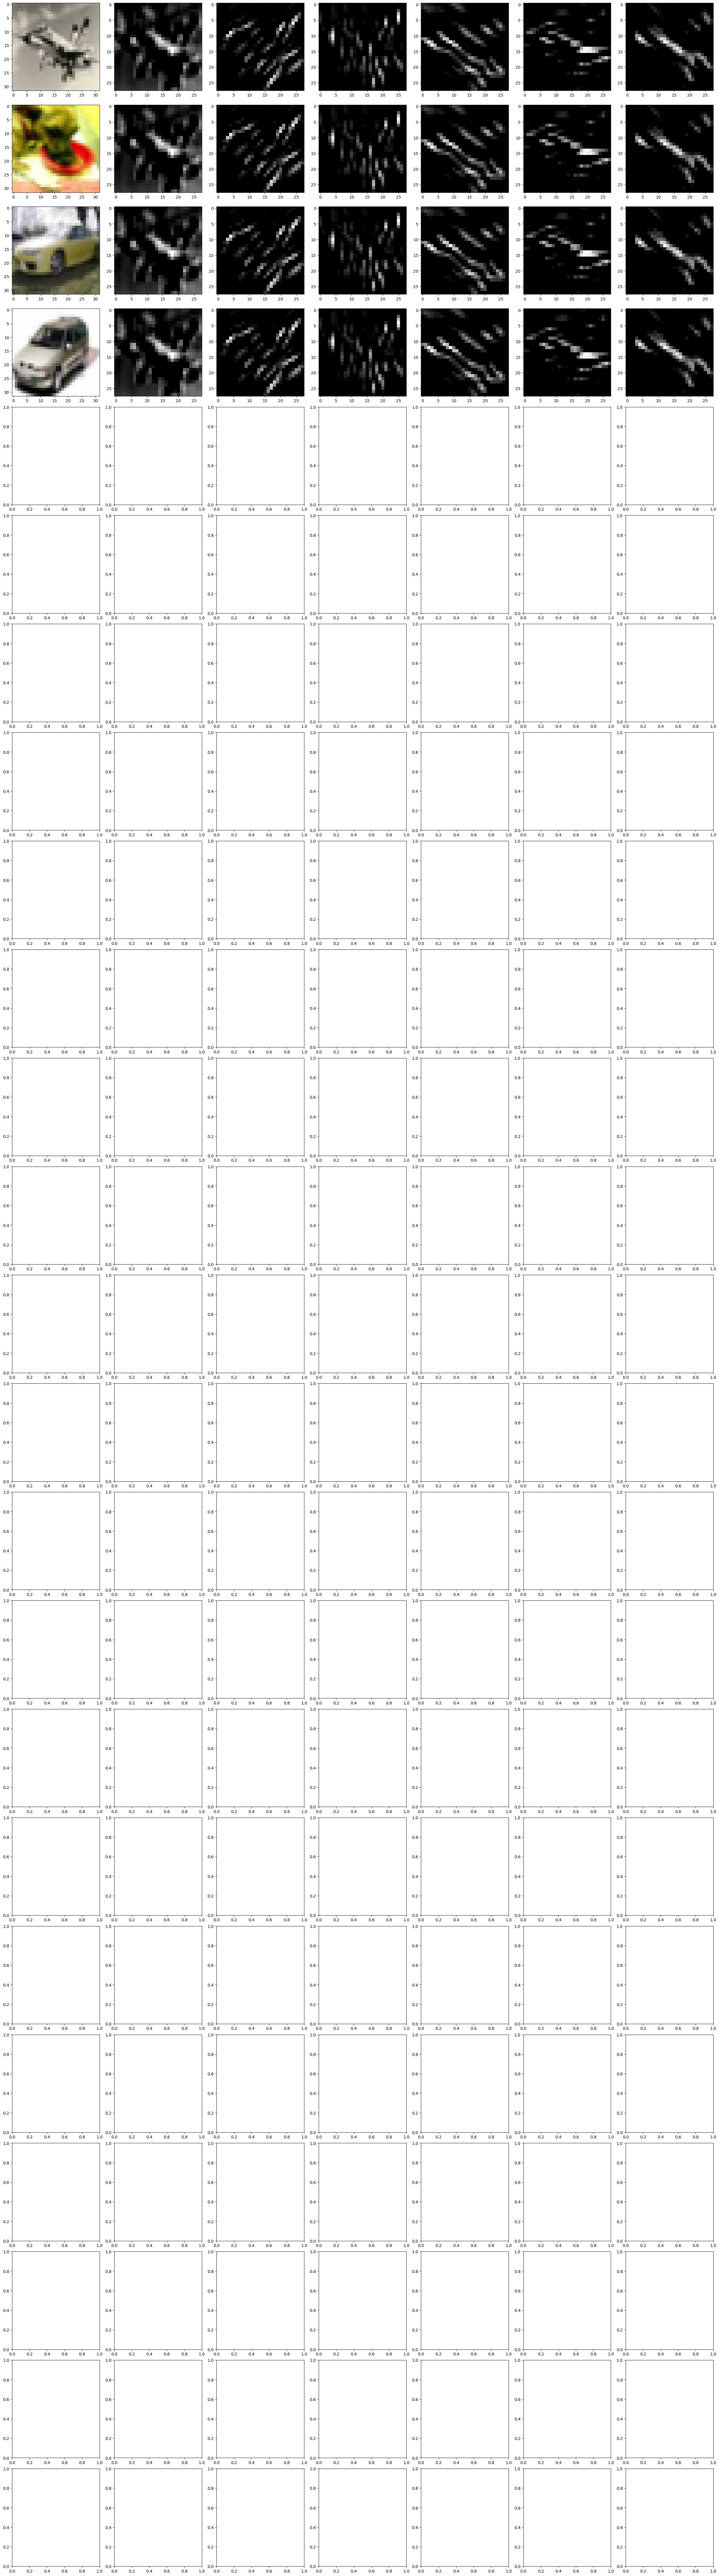

In [54]:
fig = plt.figure(constrained_layout = True, figsize = (25,90))
axs = fig.subplots(len(ac),7)
for i in range(len(ac)):
   
    bcm = np.transpose(bc[i],(1,2,0))
    
    
   
    axs[i,0].imshow(bcm)
    for j in range(6):
        axs[i,j+1].imshow(acr[j].detach(), cmap = 'gray')
        
        
        
    
    

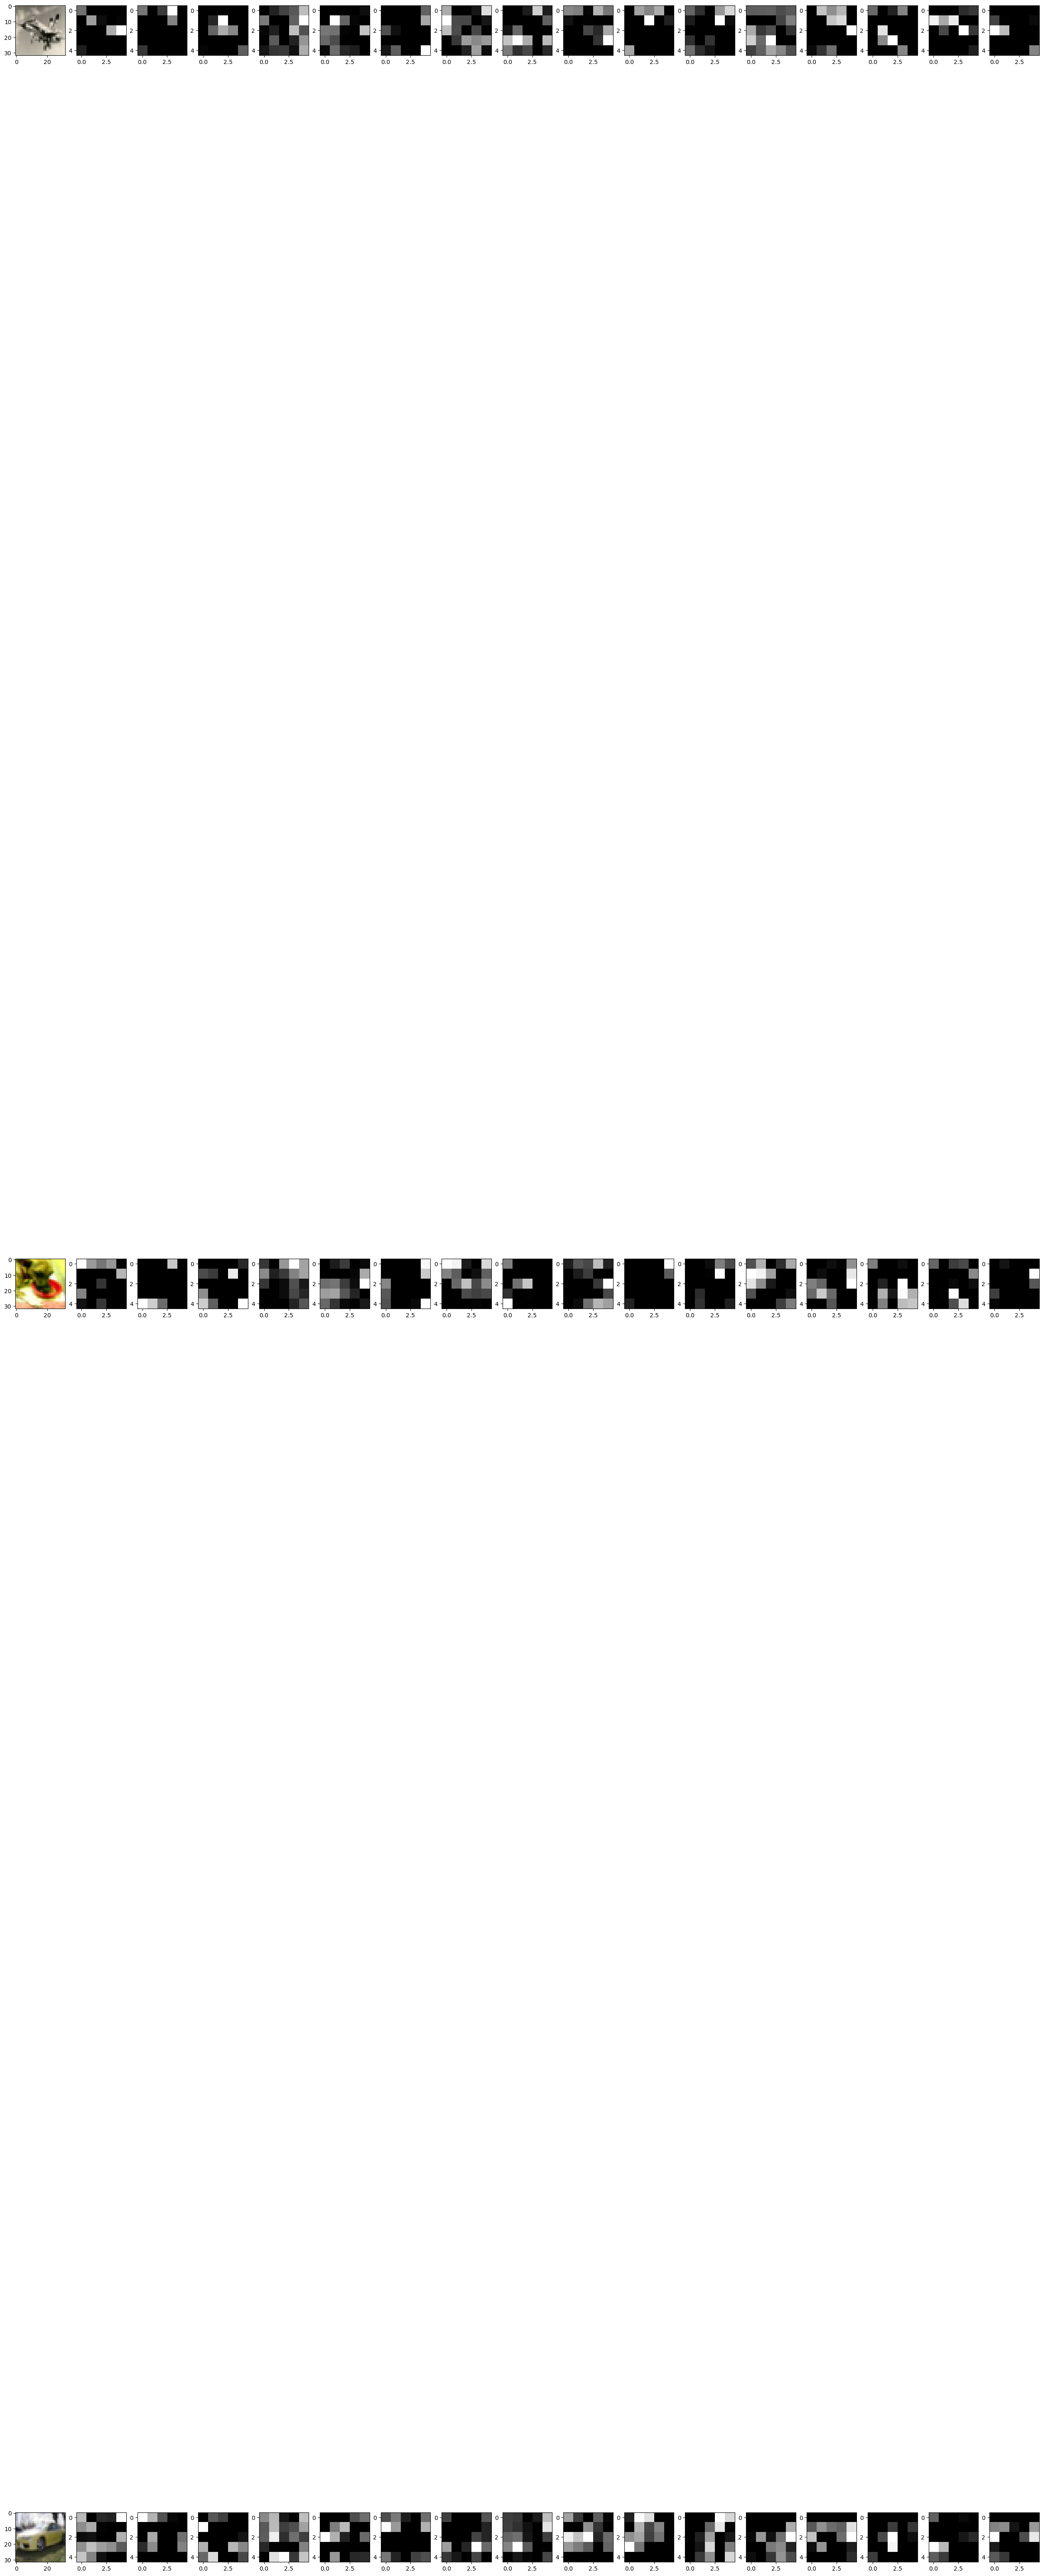

In [42]:
fig = plt.figure(constrained_layout = True, figsize = (25,90))
axs = fig.subplots(3,17)
for i in range(3):
   
    bcm = np.transpose(bc[i],(1,2,0))
    
    
   
    axs[i,0].imshow(bcm)
    for j in range(16):
        axs[i,j+1].imshow(BF[i][0][j].detach(), cmap = 'gray')
        
        
        
    
    

In [74]:
net.conv1.weight.shape

torch.Size([6, 3, 5, 5])

In [30]:
now = datetime.now()
dt_string = now.strftime("%d-%m-%Y-%H-%M-%S")
# get the absolute path of the current working directory
cwd = os.getcwd()

# create a new directory called "models" in the current working directory
models_dir = os.path.join(cwd, "Models")
os.makedirs(models_dir, exist_ok=True)

models_subdir = os.path.join(models_dir, f"{dt_string}")
os.makedirs(models_subdir, exist_ok=True)


# create a file path for the saved model

for i in range(len(listOfPaths)):
    savePath = os.path.join(models_subdir, f"model_{listOfPaths[i]}")
    # save the model to the file path
    torch.save(listOfNets[i].state_dict(), savePath)
    savePath = os.path.join(models_subdir, f"model_loss_{listOfPaths[i]}")
    torch.save(listOfLossLists[i], savePath)
    savePath = os.path.join(models_subdir, f"model_acc_{listOfPaths[i]}")
    torch.save(listOfAccuracyLists[i], savePath)



NameError: name 'listOfLossLists' is not defined